# Explicabilidad LIME

In [1]:
import lime
import lime.lime_image as li
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import tensorflow as tf
import numpy as np
from keras.applications import inception_resnet_v2 as inc_net
from skimage.segmentation import mark_boundaries

## Cargar el modelo

In [2]:
model = tf.keras.models.load_model('modelos/v2_model_06')

2022-06-24 19:44:35.238679: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Obtener la imagen 
Según el notebook de ejemplo:

In [3]:
def transform_img_fn(img_path):
    out = []

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    x = tf.keras.preprocessing.image.img_to_array(img)/255
    #x = np.expand_dims(x, axis=0)
    x = inc_net.preprocess_input(x)
    out.append(x)
    return np.vstack(out)

In [5]:
imagen = transform_img_fn('/Users/inma/Desktop/tfg/datos_originales/train/melanoma/ISIC_0011135.jpg')

Probando a mano:

In [9]:
img = tf.keras.preprocessing.image.load_img('/Users/inma/Desktop/tfg/datos_originales/train/melanoma/ISIC_0011135.jpg', target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)/255
#x = np.expand_dims(x, axis=0)
imagen = inc_net.preprocess_input(x)

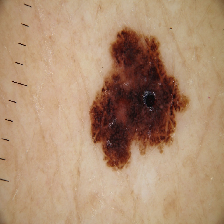

In [10]:
img

In [11]:
imagen.ndim

3

In [12]:
type(imagen.astype('double'))

numpy.ndarray

In [13]:
imagen.shape

(224, 224, 3)

In [14]:
# si expando la dimension antes, ahora tengo que modificarlo
#imagen = imagen.reshape(imagen.shape[1], imagen.shape[2], imagen.shape[3])

In [15]:
print(imagen.shape)
print(imagen.ndim)
print(type(imagen))

(224, 224, 3)
3
<class 'numpy.ndarray'>


Ver como ha quedado la imagen, para comprobar los resultados:

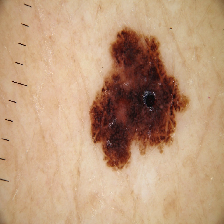

In [16]:
from keras.preprocessing.image import array_to_img
img = array_to_img(imagen)
img

## Explainer

In [17]:
explainer = li.LimeImageExplainer()

In [18]:
explanation = explainer.explain_instance(imagen.astype('double'), 
                                         model.predict, 
                                         top_labels=1, 
                                         hide_color=0, 
                                         num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

2022-06-24 19:45:34.669494: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


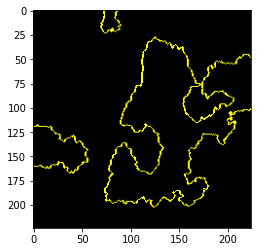

In [19]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False, 
                                            num_features=10, 
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp/ 2 + 0.5, mask))

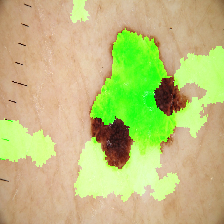

In [20]:
temp_image = array_to_img(temp)
temp_image